# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

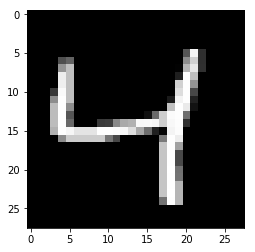

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [23]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 64 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, 784])
targets_ = tf.placeholder(tf.float32, [None, 784])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, targets_.shape[1], activation=None)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [24]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [25]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6970
Epoch: 1/20... Training loss: 0.6907
Epoch: 1/20... Training loss: 0.6841
Epoch: 1/20... Training loss: 0.6769
Epoch: 1/20... Training loss: 0.6687
Epoch: 1/20... Training loss: 0.6583
Epoch: 1/20... Training loss: 0.6463
Epoch: 1/20... Training loss: 0.6328
Epoch: 1/20... Training loss: 0.6161
Epoch: 1/20... Training loss: 0.5957
Epoch: 1/20... Training loss: 0.5753
Epoch: 1/20... Training loss: 0.5588
Epoch: 1/20... Training loss: 0.5321
Epoch: 1/20... Training loss: 0.5074
Epoch: 1/20... Training loss: 0.4829
Epoch: 1/20... Training loss: 0.4640
Epoch: 1/20... Training loss: 0.4403
Epoch: 1/20... Training loss: 0.4196
Epoch: 1/20... Training loss: 0.4006
Epoch: 1/20... Training loss: 0.3847
Epoch: 1/20... Training loss: 0.3729
Epoch: 1/20... Training loss: 0.3628
Epoch: 1/20... Training loss: 0.3479
Epoch: 1/20... Training loss: 0.3319
Epoch: 1/20... Training loss: 0.3324
Epoch: 1/20... Training loss: 0.3238
Epoch: 1/20... Training loss: 0.3189
E

Epoch: 1/20... Training loss: 0.1681
Epoch: 1/20... Training loss: 0.1706
Epoch: 1/20... Training loss: 0.1682
Epoch: 1/20... Training loss: 0.1639
Epoch: 1/20... Training loss: 0.1648
Epoch: 1/20... Training loss: 0.1640
Epoch: 1/20... Training loss: 0.1694
Epoch: 1/20... Training loss: 0.1627
Epoch: 1/20... Training loss: 0.1646
Epoch: 1/20... Training loss: 0.1676
Epoch: 1/20... Training loss: 0.1605
Epoch: 1/20... Training loss: 0.1620
Epoch: 1/20... Training loss: 0.1592
Epoch: 1/20... Training loss: 0.1671
Epoch: 1/20... Training loss: 0.1662
Epoch: 1/20... Training loss: 0.1593
Epoch: 1/20... Training loss: 0.1628
Epoch: 1/20... Training loss: 0.1669
Epoch: 1/20... Training loss: 0.1634
Epoch: 1/20... Training loss: 0.1646
Epoch: 1/20... Training loss: 0.1597
Epoch: 1/20... Training loss: 0.1632
Epoch: 1/20... Training loss: 0.1624
Epoch: 1/20... Training loss: 0.1623
Epoch: 1/20... Training loss: 0.1575
Epoch: 1/20... Training loss: 0.1601
Epoch: 1/20... Training loss: 0.1621
E

Epoch: 2/20... Training loss: 0.1333
Epoch: 2/20... Training loss: 0.1290
Epoch: 2/20... Training loss: 0.1311
Epoch: 2/20... Training loss: 0.1335
Epoch: 2/20... Training loss: 0.1295
Epoch: 2/20... Training loss: 0.1327
Epoch: 2/20... Training loss: 0.1320
Epoch: 2/20... Training loss: 0.1313
Epoch: 2/20... Training loss: 0.1296
Epoch: 2/20... Training loss: 0.1271
Epoch: 2/20... Training loss: 0.1326
Epoch: 2/20... Training loss: 0.1329
Epoch: 2/20... Training loss: 0.1355
Epoch: 2/20... Training loss: 0.1303
Epoch: 2/20... Training loss: 0.1336
Epoch: 2/20... Training loss: 0.1283
Epoch: 2/20... Training loss: 0.1305
Epoch: 2/20... Training loss: 0.1262
Epoch: 2/20... Training loss: 0.1333
Epoch: 2/20... Training loss: 0.1288
Epoch: 2/20... Training loss: 0.1311
Epoch: 2/20... Training loss: 0.1274
Epoch: 2/20... Training loss: 0.1336
Epoch: 2/20... Training loss: 0.1336
Epoch: 2/20... Training loss: 0.1320
Epoch: 2/20... Training loss: 0.1261
Epoch: 2/20... Training loss: 0.1285
E

Epoch: 3/20... Training loss: 0.1130
Epoch: 3/20... Training loss: 0.1131
Epoch: 3/20... Training loss: 0.1147
Epoch: 3/20... Training loss: 0.1105
Epoch: 3/20... Training loss: 0.1121
Epoch: 3/20... Training loss: 0.1118
Epoch: 3/20... Training loss: 0.1146
Epoch: 3/20... Training loss: 0.1106
Epoch: 3/20... Training loss: 0.1125
Epoch: 3/20... Training loss: 0.1134
Epoch: 3/20... Training loss: 0.1121
Epoch: 3/20... Training loss: 0.1111
Epoch: 3/20... Training loss: 0.1122
Epoch: 3/20... Training loss: 0.1132
Epoch: 3/20... Training loss: 0.1112
Epoch: 3/20... Training loss: 0.1145
Epoch: 3/20... Training loss: 0.1124
Epoch: 3/20... Training loss: 0.1134
Epoch: 3/20... Training loss: 0.1154
Epoch: 3/20... Training loss: 0.1117
Epoch: 3/20... Training loss: 0.1112
Epoch: 3/20... Training loss: 0.1099
Epoch: 3/20... Training loss: 0.1134
Epoch: 3/20... Training loss: 0.1162
Epoch: 3/20... Training loss: 0.1159
Epoch: 3/20... Training loss: 0.1133
Epoch: 3/20... Training loss: 0.1134
E

Epoch: 4/20... Training loss: 0.1019
Epoch: 4/20... Training loss: 0.0995
Epoch: 4/20... Training loss: 0.0988
Epoch: 4/20... Training loss: 0.0993
Epoch: 4/20... Training loss: 0.0999
Epoch: 4/20... Training loss: 0.0994
Epoch: 4/20... Training loss: 0.1017
Epoch: 4/20... Training loss: 0.1028
Epoch: 4/20... Training loss: 0.1000
Epoch: 4/20... Training loss: 0.1005
Epoch: 4/20... Training loss: 0.1012
Epoch: 4/20... Training loss: 0.0999
Epoch: 4/20... Training loss: 0.1005
Epoch: 4/20... Training loss: 0.1048
Epoch: 4/20... Training loss: 0.0996
Epoch: 4/20... Training loss: 0.1009
Epoch: 4/20... Training loss: 0.0989
Epoch: 4/20... Training loss: 0.1000
Epoch: 4/20... Training loss: 0.1000
Epoch: 4/20... Training loss: 0.1024
Epoch: 4/20... Training loss: 0.0989
Epoch: 4/20... Training loss: 0.0991
Epoch: 4/20... Training loss: 0.0988
Epoch: 4/20... Training loss: 0.1026
Epoch: 4/20... Training loss: 0.1022
Epoch: 4/20... Training loss: 0.0977
Epoch: 4/20... Training loss: 0.0988
E

Epoch: 4/20... Training loss: 0.0935
Epoch: 4/20... Training loss: 0.0933
Epoch: 4/20... Training loss: 0.0947
Epoch: 4/20... Training loss: 0.0885
Epoch: 4/20... Training loss: 0.0917
Epoch: 4/20... Training loss: 0.0926
Epoch: 4/20... Training loss: 0.0940
Epoch: 4/20... Training loss: 0.0908
Epoch: 4/20... Training loss: 0.0945
Epoch: 4/20... Training loss: 0.0933
Epoch: 4/20... Training loss: 0.0941
Epoch: 4/20... Training loss: 0.0956
Epoch: 4/20... Training loss: 0.0937
Epoch: 4/20... Training loss: 0.0943
Epoch: 4/20... Training loss: 0.0910
Epoch: 4/20... Training loss: 0.0897
Epoch: 4/20... Training loss: 0.0903
Epoch: 4/20... Training loss: 0.0921
Epoch: 4/20... Training loss: 0.0933
Epoch: 4/20... Training loss: 0.0906
Epoch: 4/20... Training loss: 0.0919
Epoch: 5/20... Training loss: 0.0951
Epoch: 5/20... Training loss: 0.0926
Epoch: 5/20... Training loss: 0.0956
Epoch: 5/20... Training loss: 0.0901
Epoch: 5/20... Training loss: 0.0942
Epoch: 5/20... Training loss: 0.0934
E

Epoch: 5/20... Training loss: 0.0862
Epoch: 5/20... Training loss: 0.0841
Epoch: 5/20... Training loss: 0.0874
Epoch: 5/20... Training loss: 0.0855
Epoch: 5/20... Training loss: 0.0862
Epoch: 5/20... Training loss: 0.0851
Epoch: 5/20... Training loss: 0.0866
Epoch: 5/20... Training loss: 0.0845
Epoch: 5/20... Training loss: 0.0904
Epoch: 5/20... Training loss: 0.0885
Epoch: 5/20... Training loss: 0.0883
Epoch: 5/20... Training loss: 0.0864
Epoch: 5/20... Training loss: 0.0840
Epoch: 5/20... Training loss: 0.0876
Epoch: 5/20... Training loss: 0.0870
Epoch: 5/20... Training loss: 0.0844
Epoch: 5/20... Training loss: 0.0873
Epoch: 5/20... Training loss: 0.0888
Epoch: 5/20... Training loss: 0.0879
Epoch: 5/20... Training loss: 0.0858
Epoch: 5/20... Training loss: 0.0905
Epoch: 5/20... Training loss: 0.0863
Epoch: 5/20... Training loss: 0.0869
Epoch: 5/20... Training loss: 0.0859
Epoch: 5/20... Training loss: 0.0875
Epoch: 5/20... Training loss: 0.0881
Epoch: 5/20... Training loss: 0.0870
E

Epoch: 6/20... Training loss: 0.0821
Epoch: 6/20... Training loss: 0.0820
Epoch: 6/20... Training loss: 0.0816
Epoch: 6/20... Training loss: 0.0818
Epoch: 6/20... Training loss: 0.0847
Epoch: 6/20... Training loss: 0.0828
Epoch: 6/20... Training loss: 0.0860
Epoch: 6/20... Training loss: 0.0853
Epoch: 6/20... Training loss: 0.0823
Epoch: 6/20... Training loss: 0.0840
Epoch: 6/20... Training loss: 0.0853
Epoch: 6/20... Training loss: 0.0829
Epoch: 6/20... Training loss: 0.0833
Epoch: 6/20... Training loss: 0.0833
Epoch: 6/20... Training loss: 0.0853
Epoch: 6/20... Training loss: 0.0838
Epoch: 6/20... Training loss: 0.0812
Epoch: 6/20... Training loss: 0.0824
Epoch: 6/20... Training loss: 0.0854
Epoch: 6/20... Training loss: 0.0837
Epoch: 6/20... Training loss: 0.0807
Epoch: 6/20... Training loss: 0.0822
Epoch: 6/20... Training loss: 0.0823
Epoch: 6/20... Training loss: 0.0829
Epoch: 6/20... Training loss: 0.0828
Epoch: 6/20... Training loss: 0.0824
Epoch: 6/20... Training loss: 0.0876
E

Epoch: 7/20... Training loss: 0.0787
Epoch: 7/20... Training loss: 0.0793
Epoch: 7/20... Training loss: 0.0806
Epoch: 7/20... Training loss: 0.0802
Epoch: 7/20... Training loss: 0.0811
Epoch: 7/20... Training loss: 0.0810
Epoch: 7/20... Training loss: 0.0831
Epoch: 7/20... Training loss: 0.0817
Epoch: 7/20... Training loss: 0.0796
Epoch: 7/20... Training loss: 0.0790
Epoch: 7/20... Training loss: 0.0826
Epoch: 7/20... Training loss: 0.0805
Epoch: 7/20... Training loss: 0.0822
Epoch: 7/20... Training loss: 0.0836
Epoch: 7/20... Training loss: 0.0796
Epoch: 7/20... Training loss: 0.0810
Epoch: 7/20... Training loss: 0.0802
Epoch: 7/20... Training loss: 0.0830
Epoch: 7/20... Training loss: 0.0795
Epoch: 7/20... Training loss: 0.0796
Epoch: 7/20... Training loss: 0.0807
Epoch: 7/20... Training loss: 0.0814
Epoch: 7/20... Training loss: 0.0821
Epoch: 7/20... Training loss: 0.0792
Epoch: 7/20... Training loss: 0.0825
Epoch: 7/20... Training loss: 0.0799
Epoch: 7/20... Training loss: 0.0791
E

Epoch: 8/20... Training loss: 0.0785
Epoch: 8/20... Training loss: 0.0783
Epoch: 8/20... Training loss: 0.0767
Epoch: 8/20... Training loss: 0.0798
Epoch: 8/20... Training loss: 0.0791
Epoch: 8/20... Training loss: 0.0773
Epoch: 8/20... Training loss: 0.0790
Epoch: 8/20... Training loss: 0.0778
Epoch: 8/20... Training loss: 0.0774
Epoch: 8/20... Training loss: 0.0776
Epoch: 8/20... Training loss: 0.0792
Epoch: 8/20... Training loss: 0.0803
Epoch: 8/20... Training loss: 0.0804
Epoch: 8/20... Training loss: 0.0768
Epoch: 8/20... Training loss: 0.0778
Epoch: 8/20... Training loss: 0.0799
Epoch: 8/20... Training loss: 0.0782
Epoch: 8/20... Training loss: 0.0775
Epoch: 8/20... Training loss: 0.0774
Epoch: 8/20... Training loss: 0.0786
Epoch: 8/20... Training loss: 0.0750
Epoch: 8/20... Training loss: 0.0782
Epoch: 8/20... Training loss: 0.0787
Epoch: 8/20... Training loss: 0.0821
Epoch: 8/20... Training loss: 0.0811
Epoch: 8/20... Training loss: 0.0772
Epoch: 8/20... Training loss: 0.0797
E

Epoch: 8/20... Training loss: 0.0780
Epoch: 8/20... Training loss: 0.0763
Epoch: 8/20... Training loss: 0.0751
Epoch: 8/20... Training loss: 0.0787
Epoch: 8/20... Training loss: 0.0778
Epoch: 8/20... Training loss: 0.0783
Epoch: 8/20... Training loss: 0.0781
Epoch: 8/20... Training loss: 0.0770
Epoch: 8/20... Training loss: 0.0759
Epoch: 8/20... Training loss: 0.0789
Epoch: 8/20... Training loss: 0.0788
Epoch: 8/20... Training loss: 0.0779
Epoch: 8/20... Training loss: 0.0749
Epoch: 8/20... Training loss: 0.0785
Epoch: 8/20... Training loss: 0.0770
Epoch: 8/20... Training loss: 0.0785
Epoch: 8/20... Training loss: 0.0791
Epoch: 8/20... Training loss: 0.0792
Epoch: 8/20... Training loss: 0.0775
Epoch: 8/20... Training loss: 0.0755
Epoch: 8/20... Training loss: 0.0761
Epoch: 9/20... Training loss: 0.0759
Epoch: 9/20... Training loss: 0.0764
Epoch: 9/20... Training loss: 0.0749
Epoch: 9/20... Training loss: 0.0795
Epoch: 9/20... Training loss: 0.0780
Epoch: 9/20... Training loss: 0.0778
E

Epoch: 9/20... Training loss: 0.0769
Epoch: 9/20... Training loss: 0.0762
Epoch: 9/20... Training loss: 0.0765
Epoch: 9/20... Training loss: 0.0759
Epoch: 9/20... Training loss: 0.0748
Epoch: 9/20... Training loss: 0.0755
Epoch: 9/20... Training loss: 0.0774
Epoch: 9/20... Training loss: 0.0775
Epoch: 9/20... Training loss: 0.0785
Epoch: 9/20... Training loss: 0.0762
Epoch: 9/20... Training loss: 0.0775
Epoch: 9/20... Training loss: 0.0750
Epoch: 9/20... Training loss: 0.0762
Epoch: 9/20... Training loss: 0.0772
Epoch: 9/20... Training loss: 0.0776
Epoch: 9/20... Training loss: 0.0810
Epoch: 9/20... Training loss: 0.0775
Epoch: 9/20... Training loss: 0.0775
Epoch: 9/20... Training loss: 0.0773
Epoch: 9/20... Training loss: 0.0782
Epoch: 9/20... Training loss: 0.0764
Epoch: 9/20... Training loss: 0.0772
Epoch: 9/20... Training loss: 0.0770
Epoch: 9/20... Training loss: 0.0804
Epoch: 9/20... Training loss: 0.0729
Epoch: 9/20... Training loss: 0.0772
Epoch: 9/20... Training loss: 0.0754
E

Epoch: 10/20... Training loss: 0.0760
Epoch: 10/20... Training loss: 0.0759
Epoch: 10/20... Training loss: 0.0786
Epoch: 10/20... Training loss: 0.0767
Epoch: 10/20... Training loss: 0.0749
Epoch: 10/20... Training loss: 0.0777
Epoch: 10/20... Training loss: 0.0758
Epoch: 10/20... Training loss: 0.0783
Epoch: 10/20... Training loss: 0.0770
Epoch: 10/20... Training loss: 0.0762
Epoch: 10/20... Training loss: 0.0765
Epoch: 10/20... Training loss: 0.0769
Epoch: 10/20... Training loss: 0.0765
Epoch: 10/20... Training loss: 0.0746
Epoch: 10/20... Training loss: 0.0764
Epoch: 10/20... Training loss: 0.0758
Epoch: 10/20... Training loss: 0.0793
Epoch: 10/20... Training loss: 0.0764
Epoch: 10/20... Training loss: 0.0760
Epoch: 10/20... Training loss: 0.0768
Epoch: 10/20... Training loss: 0.0745
Epoch: 10/20... Training loss: 0.0765
Epoch: 10/20... Training loss: 0.0752
Epoch: 10/20... Training loss: 0.0763
Epoch: 10/20... Training loss: 0.0760
Epoch: 10/20... Training loss: 0.0776
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0767
Epoch: 11/20... Training loss: 0.0777
Epoch: 11/20... Training loss: 0.0747
Epoch: 11/20... Training loss: 0.0774
Epoch: 11/20... Training loss: 0.0735
Epoch: 11/20... Training loss: 0.0770
Epoch: 11/20... Training loss: 0.0746
Epoch: 11/20... Training loss: 0.0753
Epoch: 11/20... Training loss: 0.0779
Epoch: 11/20... Training loss: 0.0762
Epoch: 11/20... Training loss: 0.0740
Epoch: 11/20... Training loss: 0.0744
Epoch: 11/20... Training loss: 0.0746
Epoch: 11/20... Training loss: 0.0776
Epoch: 11/20... Training loss: 0.0762
Epoch: 11/20... Training loss: 0.0752
Epoch: 11/20... Training loss: 0.0757
Epoch: 11/20... Training loss: 0.0772
Epoch: 11/20... Training loss: 0.0742
Epoch: 11/20... Training loss: 0.0782
Epoch: 11/20... Training loss: 0.0775
Epoch: 11/20... Training loss: 0.0758
Epoch: 11/20... Training loss: 0.0755
Epoch: 11/20... Training loss: 0.0776
Epoch: 11/20... Training loss: 0.0761
Epoch: 11/20... Training loss: 0.0750
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0781
Epoch: 11/20... Training loss: 0.0737
Epoch: 11/20... Training loss: 0.0758
Epoch: 11/20... Training loss: 0.0782
Epoch: 11/20... Training loss: 0.0748
Epoch: 11/20... Training loss: 0.0748
Epoch: 11/20... Training loss: 0.0735
Epoch: 11/20... Training loss: 0.0757
Epoch: 11/20... Training loss: 0.0737
Epoch: 11/20... Training loss: 0.0763
Epoch: 11/20... Training loss: 0.0803
Epoch: 11/20... Training loss: 0.0723
Epoch: 11/20... Training loss: 0.0738
Epoch: 11/20... Training loss: 0.0761
Epoch: 11/20... Training loss: 0.0763
Epoch: 11/20... Training loss: 0.0755
Epoch: 11/20... Training loss: 0.0778
Epoch: 11/20... Training loss: 0.0743
Epoch: 12/20... Training loss: 0.0758
Epoch: 12/20... Training loss: 0.0734
Epoch: 12/20... Training loss: 0.0772
Epoch: 12/20... Training loss: 0.0751
Epoch: 12/20... Training loss: 0.0742
Epoch: 12/20... Training loss: 0.0756
Epoch: 12/20... Training loss: 0.0769
Epoch: 12/20... Training loss: 0.0764
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0745
Epoch: 12/20... Training loss: 0.0752
Epoch: 12/20... Training loss: 0.0749
Epoch: 12/20... Training loss: 0.0765
Epoch: 12/20... Training loss: 0.0761
Epoch: 12/20... Training loss: 0.0744
Epoch: 12/20... Training loss: 0.0760
Epoch: 12/20... Training loss: 0.0764
Epoch: 12/20... Training loss: 0.0757
Epoch: 12/20... Training loss: 0.0748
Epoch: 12/20... Training loss: 0.0733
Epoch: 12/20... Training loss: 0.0757
Epoch: 12/20... Training loss: 0.0761
Epoch: 12/20... Training loss: 0.0762
Epoch: 12/20... Training loss: 0.0761
Epoch: 12/20... Training loss: 0.0757
Epoch: 12/20... Training loss: 0.0768
Epoch: 12/20... Training loss: 0.0754
Epoch: 12/20... Training loss: 0.0742
Epoch: 12/20... Training loss: 0.0742
Epoch: 12/20... Training loss: 0.0714
Epoch: 12/20... Training loss: 0.0761
Epoch: 12/20... Training loss: 0.0765
Epoch: 12/20... Training loss: 0.0797
Epoch: 12/20... Training loss: 0.0723
Epoch: 12/20... Training loss: 0.0745
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0752
Epoch: 13/20... Training loss: 0.0723
Epoch: 13/20... Training loss: 0.0764
Epoch: 13/20... Training loss: 0.0771
Epoch: 13/20... Training loss: 0.0719
Epoch: 13/20... Training loss: 0.0743
Epoch: 13/20... Training loss: 0.0758
Epoch: 13/20... Training loss: 0.0772
Epoch: 13/20... Training loss: 0.0768
Epoch: 13/20... Training loss: 0.0756
Epoch: 13/20... Training loss: 0.0743
Epoch: 13/20... Training loss: 0.0741
Epoch: 13/20... Training loss: 0.0736
Epoch: 13/20... Training loss: 0.0750
Epoch: 13/20... Training loss: 0.0761
Epoch: 13/20... Training loss: 0.0753
Epoch: 13/20... Training loss: 0.0758
Epoch: 13/20... Training loss: 0.0758
Epoch: 13/20... Training loss: 0.0739
Epoch: 13/20... Training loss: 0.0718
Epoch: 13/20... Training loss: 0.0759
Epoch: 13/20... Training loss: 0.0753
Epoch: 13/20... Training loss: 0.0776
Epoch: 13/20... Training loss: 0.0734
Epoch: 13/20... Training loss: 0.0720
Epoch: 13/20... Training loss: 0.0752
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0736
Epoch: 14/20... Training loss: 0.0761
Epoch: 14/20... Training loss: 0.0754
Epoch: 14/20... Training loss: 0.0771
Epoch: 14/20... Training loss: 0.0707
Epoch: 14/20... Training loss: 0.0740
Epoch: 14/20... Training loss: 0.0725
Epoch: 14/20... Training loss: 0.0742
Epoch: 14/20... Training loss: 0.0724
Epoch: 14/20... Training loss: 0.0729
Epoch: 14/20... Training loss: 0.0758
Epoch: 14/20... Training loss: 0.0728
Epoch: 14/20... Training loss: 0.0734
Epoch: 14/20... Training loss: 0.0737
Epoch: 14/20... Training loss: 0.0753
Epoch: 14/20... Training loss: 0.0754
Epoch: 14/20... Training loss: 0.0732
Epoch: 14/20... Training loss: 0.0763
Epoch: 14/20... Training loss: 0.0722
Epoch: 14/20... Training loss: 0.0748
Epoch: 14/20... Training loss: 0.0751
Epoch: 14/20... Training loss: 0.0742
Epoch: 14/20... Training loss: 0.0721
Epoch: 14/20... Training loss: 0.0760
Epoch: 14/20... Training loss: 0.0756
Epoch: 14/20... Training loss: 0.0731
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0762
Epoch: 15/20... Training loss: 0.0725
Epoch: 15/20... Training loss: 0.0753
Epoch: 15/20... Training loss: 0.0737
Epoch: 15/20... Training loss: 0.0750
Epoch: 15/20... Training loss: 0.0733
Epoch: 15/20... Training loss: 0.0730
Epoch: 15/20... Training loss: 0.0736
Epoch: 15/20... Training loss: 0.0746
Epoch: 15/20... Training loss: 0.0752
Epoch: 15/20... Training loss: 0.0764
Epoch: 15/20... Training loss: 0.0735
Epoch: 15/20... Training loss: 0.0744
Epoch: 15/20... Training loss: 0.0735
Epoch: 15/20... Training loss: 0.0744
Epoch: 15/20... Training loss: 0.0726
Epoch: 15/20... Training loss: 0.0759
Epoch: 15/20... Training loss: 0.0747
Epoch: 15/20... Training loss: 0.0733
Epoch: 15/20... Training loss: 0.0734
Epoch: 15/20... Training loss: 0.0739
Epoch: 15/20... Training loss: 0.0741
Epoch: 15/20... Training loss: 0.0742
Epoch: 15/20... Training loss: 0.0719
Epoch: 15/20... Training loss: 0.0743
Epoch: 15/20... Training loss: 0.0743
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0745
Epoch: 15/20... Training loss: 0.0735
Epoch: 15/20... Training loss: 0.0742
Epoch: 15/20... Training loss: 0.0745
Epoch: 15/20... Training loss: 0.0725
Epoch: 15/20... Training loss: 0.0755
Epoch: 15/20... Training loss: 0.0708
Epoch: 15/20... Training loss: 0.0745
Epoch: 15/20... Training loss: 0.0723
Epoch: 15/20... Training loss: 0.0735
Epoch: 15/20... Training loss: 0.0736
Epoch: 15/20... Training loss: 0.0736
Epoch: 15/20... Training loss: 0.0742
Epoch: 15/20... Training loss: 0.0768
Epoch: 15/20... Training loss: 0.0740
Epoch: 15/20... Training loss: 0.0717
Epoch: 15/20... Training loss: 0.0750
Epoch: 15/20... Training loss: 0.0755
Epoch: 15/20... Training loss: 0.0755
Epoch: 15/20... Training loss: 0.0745
Epoch: 15/20... Training loss: 0.0749
Epoch: 15/20... Training loss: 0.0761
Epoch: 15/20... Training loss: 0.0766
Epoch: 15/20... Training loss: 0.0751
Epoch: 15/20... Training loss: 0.0755
Epoch: 15/20... Training loss: 0.0740
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0746
Epoch: 16/20... Training loss: 0.0731
Epoch: 16/20... Training loss: 0.0717
Epoch: 16/20... Training loss: 0.0723
Epoch: 16/20... Training loss: 0.0742
Epoch: 16/20... Training loss: 0.0737
Epoch: 16/20... Training loss: 0.0728
Epoch: 16/20... Training loss: 0.0719
Epoch: 16/20... Training loss: 0.0742
Epoch: 16/20... Training loss: 0.0742
Epoch: 16/20... Training loss: 0.0759
Epoch: 16/20... Training loss: 0.0747
Epoch: 16/20... Training loss: 0.0770
Epoch: 16/20... Training loss: 0.0749
Epoch: 16/20... Training loss: 0.0712
Epoch: 16/20... Training loss: 0.0736
Epoch: 16/20... Training loss: 0.0737
Epoch: 16/20... Training loss: 0.0721
Epoch: 16/20... Training loss: 0.0745
Epoch: 16/20... Training loss: 0.0733
Epoch: 16/20... Training loss: 0.0764
Epoch: 16/20... Training loss: 0.0750
Epoch: 16/20... Training loss: 0.0738
Epoch: 16/20... Training loss: 0.0739
Epoch: 16/20... Training loss: 0.0740
Epoch: 16/20... Training loss: 0.0735
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0751
Epoch: 17/20... Training loss: 0.0741
Epoch: 17/20... Training loss: 0.0762
Epoch: 17/20... Training loss: 0.0740
Epoch: 17/20... Training loss: 0.0741
Epoch: 17/20... Training loss: 0.0752
Epoch: 17/20... Training loss: 0.0745
Epoch: 17/20... Training loss: 0.0733
Epoch: 17/20... Training loss: 0.0747
Epoch: 17/20... Training loss: 0.0723
Epoch: 17/20... Training loss: 0.0726
Epoch: 17/20... Training loss: 0.0741
Epoch: 17/20... Training loss: 0.0745
Epoch: 17/20... Training loss: 0.0723
Epoch: 17/20... Training loss: 0.0737
Epoch: 17/20... Training loss: 0.0733
Epoch: 17/20... Training loss: 0.0724
Epoch: 17/20... Training loss: 0.0747
Epoch: 17/20... Training loss: 0.0743
Epoch: 17/20... Training loss: 0.0729
Epoch: 17/20... Training loss: 0.0741
Epoch: 17/20... Training loss: 0.0731
Epoch: 17/20... Training loss: 0.0733
Epoch: 17/20... Training loss: 0.0752
Epoch: 17/20... Training loss: 0.0748
Epoch: 17/20... Training loss: 0.0731
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0735
Epoch: 18/20... Training loss: 0.0740
Epoch: 18/20... Training loss: 0.0727
Epoch: 18/20... Training loss: 0.0723
Epoch: 18/20... Training loss: 0.0737
Epoch: 18/20... Training loss: 0.0756
Epoch: 18/20... Training loss: 0.0714
Epoch: 18/20... Training loss: 0.0727
Epoch: 18/20... Training loss: 0.0725
Epoch: 18/20... Training loss: 0.0745
Epoch: 18/20... Training loss: 0.0711
Epoch: 18/20... Training loss: 0.0727
Epoch: 18/20... Training loss: 0.0733
Epoch: 18/20... Training loss: 0.0747
Epoch: 18/20... Training loss: 0.0736
Epoch: 18/20... Training loss: 0.0742
Epoch: 18/20... Training loss: 0.0758
Epoch: 18/20... Training loss: 0.0726
Epoch: 18/20... Training loss: 0.0766
Epoch: 18/20... Training loss: 0.0754
Epoch: 18/20... Training loss: 0.0730
Epoch: 18/20... Training loss: 0.0739
Epoch: 18/20... Training loss: 0.0712
Epoch: 18/20... Training loss: 0.0742
Epoch: 18/20... Training loss: 0.0729
Epoch: 18/20... Training loss: 0.0762
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0759
Epoch: 18/20... Training loss: 0.0748
Epoch: 18/20... Training loss: 0.0758
Epoch: 18/20... Training loss: 0.0750
Epoch: 18/20... Training loss: 0.0736
Epoch: 18/20... Training loss: 0.0741
Epoch: 18/20... Training loss: 0.0741
Epoch: 18/20... Training loss: 0.0745
Epoch: 18/20... Training loss: 0.0734
Epoch: 18/20... Training loss: 0.0736
Epoch: 18/20... Training loss: 0.0715
Epoch: 18/20... Training loss: 0.0740
Epoch: 18/20... Training loss: 0.0745
Epoch: 18/20... Training loss: 0.0715
Epoch: 18/20... Training loss: 0.0751
Epoch: 18/20... Training loss: 0.0736
Epoch: 18/20... Training loss: 0.0740
Epoch: 18/20... Training loss: 0.0733
Epoch: 18/20... Training loss: 0.0731
Epoch: 18/20... Training loss: 0.0725
Epoch: 18/20... Training loss: 0.0727
Epoch: 18/20... Training loss: 0.0735
Epoch: 18/20... Training loss: 0.0737
Epoch: 18/20... Training loss: 0.0716
Epoch: 18/20... Training loss: 0.0767
Epoch: 18/20... Training loss: 0.0738
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0743
Epoch: 19/20... Training loss: 0.0739
Epoch: 19/20... Training loss: 0.0726
Epoch: 19/20... Training loss: 0.0742
Epoch: 19/20... Training loss: 0.0720
Epoch: 19/20... Training loss: 0.0731
Epoch: 19/20... Training loss: 0.0738
Epoch: 19/20... Training loss: 0.0749
Epoch: 19/20... Training loss: 0.0740
Epoch: 19/20... Training loss: 0.0747
Epoch: 19/20... Training loss: 0.0717
Epoch: 19/20... Training loss: 0.0715
Epoch: 19/20... Training loss: 0.0736
Epoch: 19/20... Training loss: 0.0749
Epoch: 19/20... Training loss: 0.0759
Epoch: 19/20... Training loss: 0.0728
Epoch: 19/20... Training loss: 0.0740
Epoch: 19/20... Training loss: 0.0749
Epoch: 19/20... Training loss: 0.0737
Epoch: 19/20... Training loss: 0.0756
Epoch: 19/20... Training loss: 0.0733
Epoch: 19/20... Training loss: 0.0726
Epoch: 19/20... Training loss: 0.0757
Epoch: 19/20... Training loss: 0.0756
Epoch: 19/20... Training loss: 0.0726
Epoch: 19/20... Training loss: 0.0732
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0734
Epoch: 20/20... Training loss: 0.0739
Epoch: 20/20... Training loss: 0.0732
Epoch: 20/20... Training loss: 0.0726
Epoch: 20/20... Training loss: 0.0742
Epoch: 20/20... Training loss: 0.0760
Epoch: 20/20... Training loss: 0.0738
Epoch: 20/20... Training loss: 0.0725
Epoch: 20/20... Training loss: 0.0746
Epoch: 20/20... Training loss: 0.0735
Epoch: 20/20... Training loss: 0.0746
Epoch: 20/20... Training loss: 0.0737
Epoch: 20/20... Training loss: 0.0712
Epoch: 20/20... Training loss: 0.0738
Epoch: 20/20... Training loss: 0.0733
Epoch: 20/20... Training loss: 0.0766
Epoch: 20/20... Training loss: 0.0741
Epoch: 20/20... Training loss: 0.0727
Epoch: 20/20... Training loss: 0.0743
Epoch: 20/20... Training loss: 0.0748
Epoch: 20/20... Training loss: 0.0733
Epoch: 20/20... Training loss: 0.0728
Epoch: 20/20... Training loss: 0.0741
Epoch: 20/20... Training loss: 0.0729
Epoch: 20/20... Training loss: 0.0737
Epoch: 20/20... Training loss: 0.0719
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

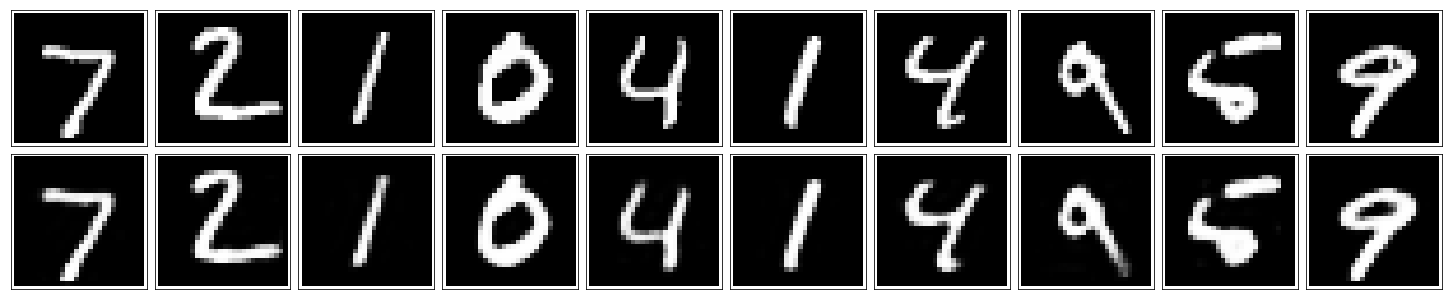

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [27]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.